In [24]:
import os
from graphviz import Source
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#Before importing export_graphviz, make sure that you've installed it via 
#this command in terminal: "conda install python-graphviz"
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#To make the notebook's output stabel across runs
np.random.seed(42)

#Uses Jupyter's own backend to plot
%matplotlib inline

#To make pretty figures
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

#Path to saving images
IMAGE_PATH = os.path.join("images")
os.makedirs(IMAGE_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGE_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension ,dpi=resolution)

Decision Trees can perform both classification, regression tasks and even multioutput tasks. Furthermore, they're capable of fitting complex datasets. <br>
We'll be starting with how to train -> visualize -> predictions with Decision Trees. Then go through the CART training algorithm used by Scikit Learn -> regularize trees -> use trees for regression tasks. <br>
Finally, we'll have a look at the limitation of Decision Trees

# Section: Training And Visualizing A Decision Tree

The following trains a DecisionTreeClassifier on the iris dataset

In [8]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

Let's visualize the trained Decision Tree by using the export_graphviz() method. It outputs a filled called <em>iris_tree.dot</em>

Figure 6-1


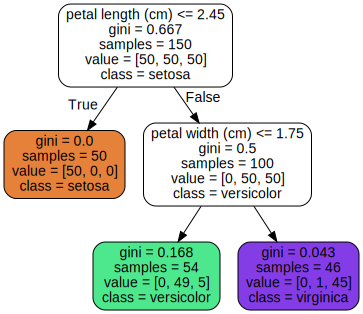

In [13]:
export_graphviz(
    tree_clf,
    out_file = os.path.join(IMAGE_PATH, "iris_tree.dot"),
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)
print("Figure 6-1")
Source.from_file(os.path.join(IMAGE_PATH, "iris_tree.dot"))
#To convert the .dot file to a png use this following command in the terminal,
#make sure that you're in the same folder as the .dot file: 
# "$ dot -Tpng iris_tree.dot -o iris_tree.png"

# End Of Section: Training And Visualizing A Decision Tree

# Section:Making Predictions

The tree illustrated on figure 6-1 shows how a prediction is represented. To classify a flower, you start at the top, which is the <em>root node</em> (depth 0). Then the process is as follows:
<ul>
    <li>The top node asks whether the flower's petal is smaller than 2.45cm.</li>
    <li>Depending on the answer, you move down the tree (depth 1) to the root's child node until you reach a predicted class node. In the case that a child node doesn't have any child nodes, it's called a <em>leaf node</em></li>
</ul>

<strong>Note</strong>, Decision Trees require very little data preparation. An aspect of that is they don't require feature scaling or centering

Let's define the following to get a better understanding of what a node consists of:
<ul>
    <li><strong>Samples</strong> counts how many training instances it applies to. I.g, 100 training instances have a petal length greater than 2.45cm</li>
    <li><strong>Value</strong> tells how many training instances of each class this node applies to. I.g, the bottom right node applies to 0 "Iris Setosa", 1 "Iris Versicolor" and 45 "Iris Verginica"</li>
    <li><strong>Gini</strong> measure <em>impurity</em>, a node is "pure" (gini = 0) if all training instances it applies to belong to the same class </li>
</ul>

To get a <strong>gini</strong> we apply equation 6-1 to the left node that's in depth =2 (green): $1 - (0/54)^2 - (49/54)^2 - (5/54)^2 \approx 0.168$ <br>
$p_{i,k}$ is the ration of class $k$ instances among the training instances in the $i^{th}$ node

<img src="images/Decision tree - Gini impurity.png">

Scikit Learn uses the CART algorithm, which produces only <em>binary trees</em>: nonleaf nodes always have two children. However, other algorithms such as ID3 can produce Decision Trees with nodes that have more than two children

Let's illustrate the decision boundaries of the Decision Tree

Saving figure Decision tree - Decision boundaries


[]

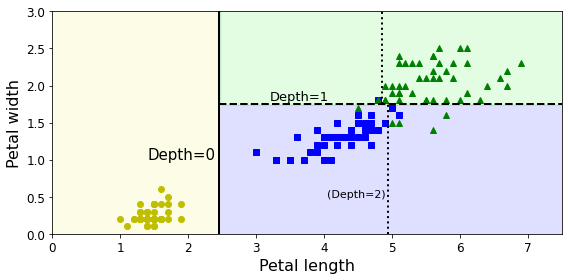

In [39]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True,
                           legend=False ,plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, alpha=0.8, cmap=custom_cmap2)
    if iris:
        plt.xlabel("Petal length", fontsize=16)
        plt.ylabel("Petal width", fontsize=16)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", rotation=0, fontsize=18)
    if legend:
        plt.legend(loc="lower right", fontsize=16)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris Virginica")
        plt.axis(axes)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
        
save_fig("Decision tree - Decision boundaries")
plt.plot()

<ul>
    <li>
        <strong>The lefthand</strong> is pure( only Iris Setosa), it can't be split further
        <ul>
            <li><strong>The thick vertical line</strong> represents the decision boundary of the rooth node (depth=0), petal length=2.45cm</li>
            <li>
        </ul>
    </li>
    <li>
        <strong>The rightand</strong> is impure, thus it can be split further
        <ul>
            <li><strong>The depth=1 node</strong> splits the it at petal width=1.75cm (dashed line)</li>
            <li>
                <strong>max_depth=2</strong>, thus the Decision Tree stops after Depth=2. If max_depth=3, then the Depth=2 nodes would each add nother decision boundary (dotted lines)
            </li>
        </ul>
    </li>
</ul>
